In [12]:
import math
import random


In [13]:

"""
Multiple    Rarity
6           30.55%
7           26.18%
8           22.91%
9           20.36%
"""

rarities = [0.3055, 0.2618, 0.2291, 0.2036]
multiples = [6, 7, 8, 9]
white_list_num = 2000

# total 2000 mint whitelist
# print([2000 * rarities[i] for i in range(4)])
# [611.0, 523.5999999999999, 458.2, 407.2]
# after Round
# m_distribution = [611, 523, 458, 407]
m_distribution = [round(white_list_num * rarities[i]) for i in range(len(multiples))]
print("multiple distribution: ", m_distribution)


def compute_goo_balance(emission_multiple, last_balance, time_elapsed):
    t1 = math.sqrt(emission_multiple) * time_elapsed + \
        2 * math.sqrt(last_balance)
    final_amount = 0.25 * t1 * t1

    return final_amount


def single_goo(time_elasped):

    m_goo = []
    for i in range(len(multiples)):
        m_goo.append(compute_goo_balance(multiples[i], 0, time_elasped))

    return m_goo


def sum_goo(time_elasped):

    one_goo = single_goo(time_elasped)
    total_goo = []
    for i in range(len(m_distribution)):
        total_goo.append(one_goo[i] * m_distribution[i])

    return sum(total_goo), total_goo


final_day = 10

begin_goo = single_goo(1)
end_goo = single_goo(final_day)

print("from 1st day to {}st day one Golbers produced GOO".format(final_day))
print("M=6 1st day {:.4f} final day {:.4f}".format(begin_goo[0], end_goo[0]))
print("M=7 1st day {:.4f} final day {:.4f}".format(begin_goo[1], end_goo[1]))
print("M=8 1st day {:.4f} final day {:.4f}".format(begin_goo[2], end_goo[2]))
print("M=9 1st day {:.4f} final day {:.4f}".format(begin_goo[3], end_goo[3]))
print("")

(_, begin_goo) = sum_goo(1)
(_, end_goo) = sum_goo(final_day)

print("from 1st day to {}st day all Golbers produced GOO".format(final_day))
print("M=6 1st day {:.4f} final day {:.4f}".format(begin_goo[0], end_goo[0]))
print("M=7 1st day {:.4f} final day {:.4f}".format(begin_goo[1], end_goo[1]))
print("M=8 1st day {:.4f} final day {:.4f}".format(begin_goo[2], end_goo[2]))
print("M=9 1st day {:.4f} final day {:.4f}".format(begin_goo[3], end_goo[3]))


multiple distribution:  [611, 524, 458, 407]
from 1st day to 10st day one Golbers produced GOO
M=6 1st day 1.5000 final day 150.0000
M=7 1st day 1.7500 final day 175.0000
M=8 1st day 2.0000 final day 200.0000
M=9 1st day 2.2500 final day 225.0000

from 1st day to 10st day all Golbers produced GOO
M=6 1st day 916.5000 final day 91650.0000
M=7 1st day 917.0000 final day 91700.0000
M=8 1st day 916.0000 final day 91600.0000
M=9 1st day 915.7500 final day 91575.0000


In [14]:
"""
Gobblers
"""


class Pricer:

    def compute_gobbler_price(self, time_since_start, num_sold, initial_price, per_period_price_decrease, logistic_scale, time_scale, time_shift):
       return self.compute_vrgda_price(time_since_start, num_sold, initial_price, per_period_price_decrease, logistic_scale, time_scale, time_shift)

    def compute_page_price(self, time_since_start, num_sold, initial_price, per_period_price_decrease, logistic_scale, time_scale, time_shift,  per_period_post_switchover, switchover_time):
        initial_value = logistic_scale/ (1 +math.exp(time_scale * time_shift))
        sold_by_switchover = logistic_scale / (1 + math.exp(-1 * time_scale * (switchover_time - time_shift))) - initial_value
        if num_sold < sold_by_switchover:
            return self.compute_vrgda_price(time_since_start, num_sold, initial_price, per_period_price_decrease, logistic_scale, time_scale, time_shift)
        else: 
            f_inv = (num_sold - sold_by_switchover) / per_period_post_switchover + switchover_time
            return initial_price * math.exp(-math.log(1 - per_period_price_decrease) * (f_inv - time_since_start))

    def compute_vrgda_price(self, time_since_start, num_sold, initial_price, per_period_price_decrease, logistic_scale, time_scale, time_shift):
        initial_value = logistic_scale / (1 + math.exp(time_scale * time_shift))
        logistic_value = num_sold + initial_value
        price = (1 - per_period_price_decrease) ** (time_since_start - time_shift + (math.log(-1 + logistic_scale / logistic_value) / time_scale)) * initial_price
        return price


class Holder():
    '''whitelist holder'''

    def __init__(self, m):
        self.m = m
        self.m0 = m
        self.balance = 0  # goo
        self.gobblers = 1
        self.last_update_time = 0  # day
        pass

    def update_balance(self, time_from_revealed):
        time_elapsed = time_from_revealed - self.last_update_time
        # Revealed should after mint_start (a day)
        if time_elapsed > 0:
            self.balance = compute_goo_balance(
                self.m, self.balance, time_elapsed)
            self.last_update_time = time_from_revealed

    def buy_gobblers(self, price, m):
        if (self.balance >= price):
            self.balance -= price
            self.m += m
            self.gobblers += 1


class ArtGobblers():
    def __init__(self, ):
        self.pricer = Pricer()
        self.last_price = 69.42
        self.num_sold = 0
        pass

    def calculate_gobblers_price(self, time_since_start):
        return self.pricer.compute_gobbler_price(
            time_since_start,
            self.num_sold+1,
            69.42,  # init price
            0.31,  # Price decay percent.
            6393 * 2,  # Logstic scale L+1
            0.0023,  # Time scale
            0
        )

    def update(self, time_since_start):
        self.last_price = self.calculate_gobblers_price(time_since_start)

    def mint_from_goo(self, buyer, time_since_start):
        self.update(time_since_start)
        self.num_sold += 1
        buyer.buy_gobblers(self.last_price, m=6)
        print("day {:.2f} mint_from_goo price {:.4f} buyer m0 {} m {} gobblers {} balance {:.4f}".format(
            time_since_start, self.last_price, buyer.m0, buyer.m, buyer.gobblers, buyer.balance))
        self.update(time_since_start)


In [15]:

time_step = 0.001

"""
4 whitelist holders
"""
print("4 holders")

gobblers = ArtGobblers()
holders = [Holder(6), Holder(7), Holder(8), Holder(9)]
random.shuffle(holders)

cur_t = 0
while cur_t < final_day:
    gobblers.update(cur_t)
    gobblers_price = gobblers.last_price
    for _holder in holders:
        _holder.update_balance(cur_t)
        if _holder.balance >= gobblers_price:
            gobblers.mint_from_goo(_holder, cur_t)
    cur_t += time_step

print("gobblers last_price", gobblers.last_price)
print("gobblers last_price", gobblers.num_sold)
print("final gobblers hold num: ", [_holder.gobblers for _holder in holders])
print("")


"""
many whitelist holders
"""
print("2000 holders")

gobblers = ArtGobblers()
holders = []

for i in range(len(multiples)):
    for j in range(m_distribution[i]):
        holders.append(Holder(multiples[i]))

random.shuffle(holders)

cur_t = 0
x_labels_gobblers = []
y_data_gobblers = []
# compare hold group
ydata_m6 = []
ydata_m7 = []
ydata_m8 = []
ydata_m9 = []

while cur_t < final_day:
    gobblers.update(cur_t)
    gobblers_price = gobblers.last_price
    for _holder in holders:
        _holder.update_balance(cur_t)
        if _holder.balance >= gobblers.last_price:
            gobblers.mint_from_goo(_holder, cur_t)

    x_labels_gobblers.append(cur_t)
    y_data_gobblers.append(gobblers_price)

    m_goo = single_goo(cur_t)
    ydata_m6.append(m_goo[0])     # multiple 6
    ydata_m7.append(m_goo[1])     # multiple 7
    ydata_m8.append(m_goo[2])     # multiple 8
    ydata_m9.append(m_goo[3])     # multiple 9

    cur_t += time_step

print("gobblers last_price", gobblers.last_price)
print("gobblers num_sold", gobblers.num_sold)
# print("final gobblers hold num: ", [_holder.gobblers for _holder in holders])
print("")


4 holders
day 3.17 mint_from_goo price 22.5528 buyer m0 9 m 15 gobblers 2 balance 0.0002
day 3.34 mint_from_goo price 22.2619 buyer m0 8 m 14 gobblers 2 balance 0.0092
day 3.53 mint_from_goo price 21.7962 buyer m0 7 m 13 gobblers 2 balance 0.0104
day 3.75 mint_from_goo price 21.1118 buyer m0 6 m 12 gobblers 2 balance 0.0045
day 5.07 mint_from_goo price 13.6361 buyer m0 9 m 21 gobblers 3 balance 0.0080
day 5.25 mint_from_goo price 13.4204 buyer m0 8 m 20 gobblers 3 balance 0.0152
day 5.47 mint_from_goo price 12.9749 buyer m0 7 m 19 gobblers 3 balance 0.0064
day 5.74 mint_from_goo price 12.3456 buyer m0 6 m 18 gobblers 3 balance 0.0017
day 6.42 mint_from_goo price 10.1153 buyer m0 9 m 27 gobblers 4 balance 0.0004
day 6.60 mint_from_goo price 9.9331 buyer m0 8 m 26 gobblers 4 balance 0.0085
day 6.85 mint_from_goo price 9.5182 buyer m0 7 m 25 gobblers 4 balance 0.0029
day 7.14 mint_from_goo price 9.0029 buyer m0 6 m 24 gobblers 4 balance 0.0020
day 7.51 mint_from_goo price 8.2359 buyer m0 

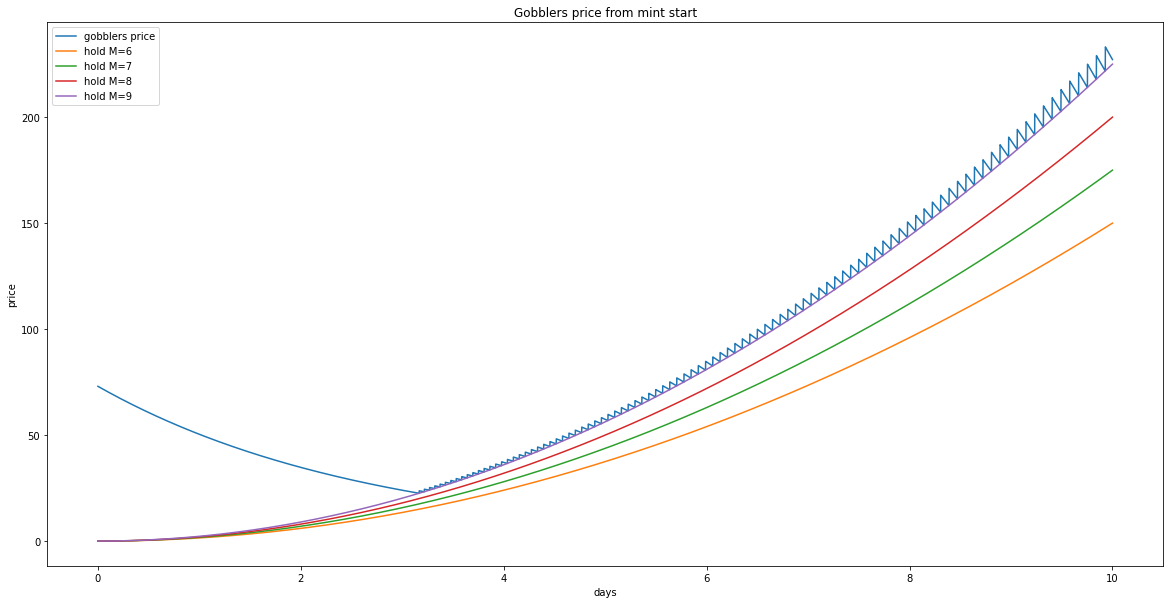

In [18]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Gobblers price from mint start')
ax.set_xlabel('days')
ax.set_ylabel('price')
ax.plot(x_labels_gobblers, y_data_gobblers)
ax.plot(x_labels_gobblers, ydata_m6)
ax.plot(x_labels_gobblers, ydata_m7)
ax.plot(x_labels_gobblers, ydata_m8)
ax.plot(x_labels_gobblers, ydata_m9)
custom_lines = [
    Line2D(x_labels_gobblers, y_data_gobblers, color='tab:blue'),
    Line2D(x_labels_gobblers, ydata_m6, color='tab:orange'),
    Line2D(x_labels_gobblers, ydata_m7, color='tab:green'),
    Line2D(x_labels_gobblers, ydata_m8, color='tab:red'),
    Line2D(x_labels_gobblers, ydata_m9, color='tab:purple'),
]
ax.legend(custom_lines, ['gobblers price', 'hold M=6',
          'hold M=7', 'hold M=8', 'hold M=9'])
